In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading dataset

In [3]:
df = pd.read_csv(r"C:\Users\91998\Downloads\archive (5)\diabetes_prediction_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Observation: All the column names and data types are correct.
## There are no missing values found in this dataset.

In [6]:
### Finding Duplicates
df.duplicated().sum()

3854

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Exploratory Data Analysis

### Categorical columns

In [11]:
df["gender"].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

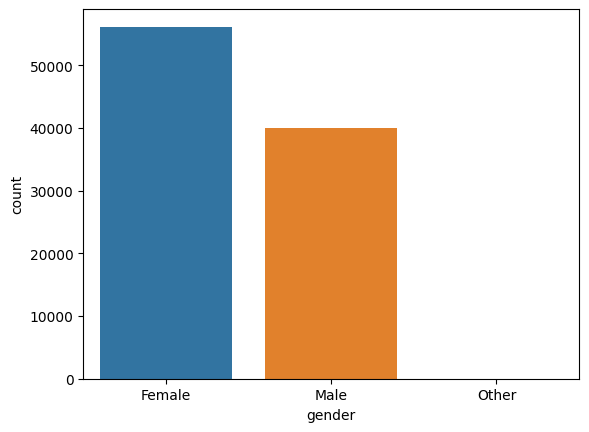

In [12]:
sns.countplot(data=df,x="gender")

## Observation: As Other are low in number we can remove those data.

In [13]:
df = df[df['gender']!='Other']

In [14]:
df["gender"].value_counts()

Female    56161
Male      39967
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

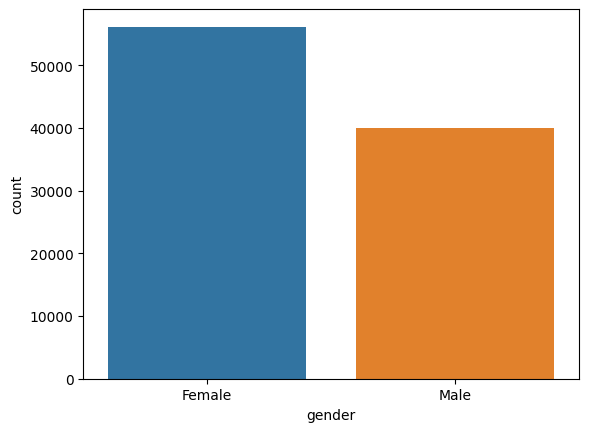

In [15]:
sns.countplot(data=df,x="gender")

In [16]:
df["smoking_history"].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

<Axes: xlabel='smoking_history', ylabel='count'>

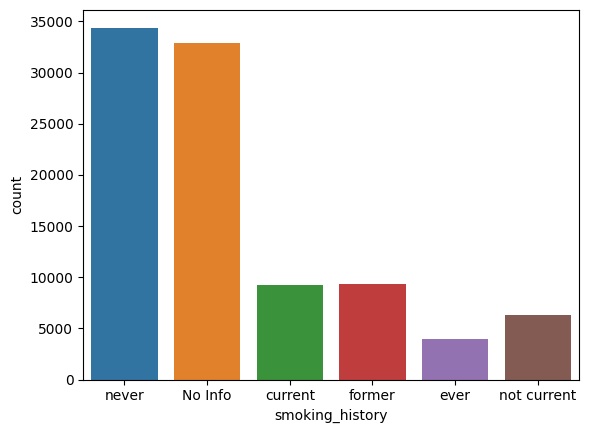

In [17]:
sns.countplot(data=df,x="smoking_history")

## Observation: more than 30% data  have no info about smoking history , it like to be big missing values so we will remove this column better to maintain data integrity

### Numeerical columns

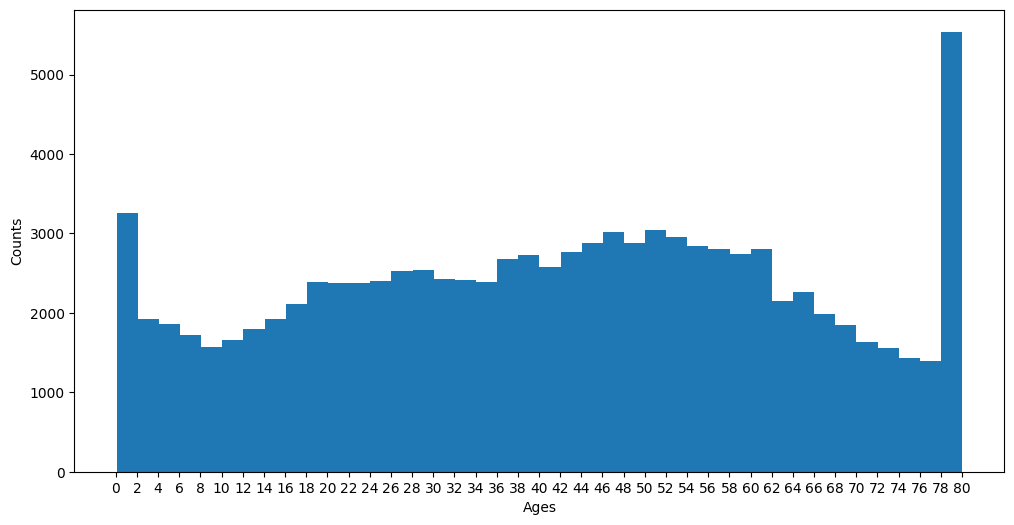

In [18]:
## age
plt.figure(figsize = [12,6]);
plt.hist(df['age'], bins = 40);
plt.xlabel('Ages');
plt.ylabel('Counts');
plt.xticks(np.arange(0,82,2));

<Axes: xlabel='age'>

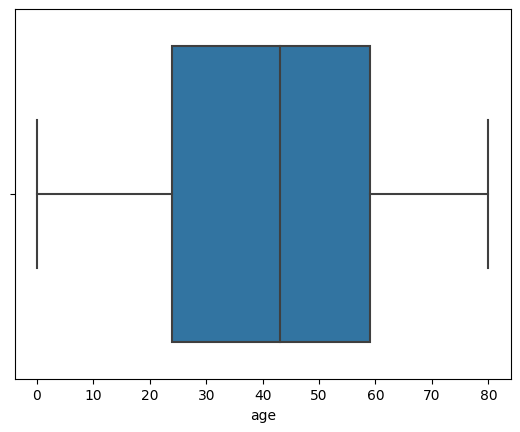

In [19]:
sns.boxplot(data=df,x="age")

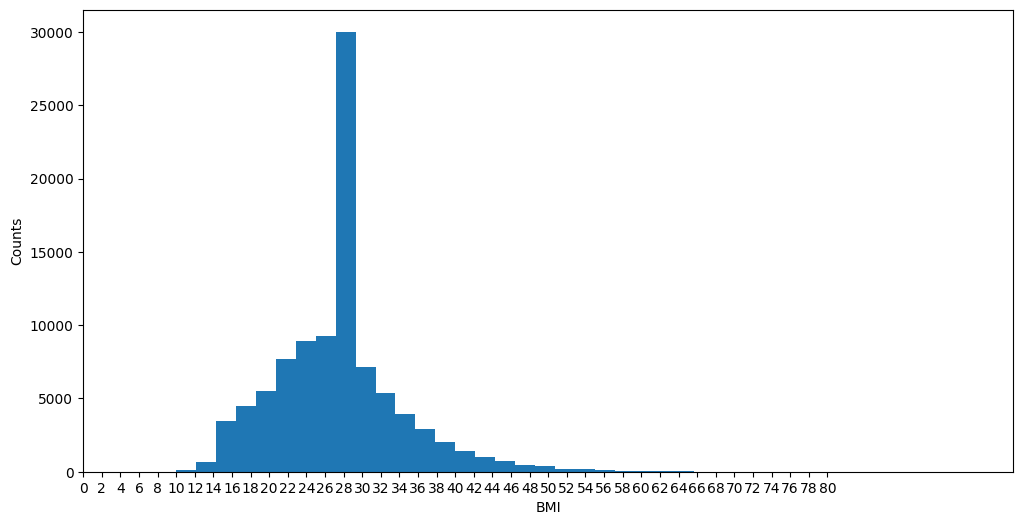

In [20]:
## Bmi
plt.figure(figsize = [12,6]);
plt.hist(df['bmi'], bins = 40);
plt.xlabel('BMI');
plt.ylabel('Counts');
plt.xticks(np.arange(0,82,2));

<Axes: ylabel='bmi'>

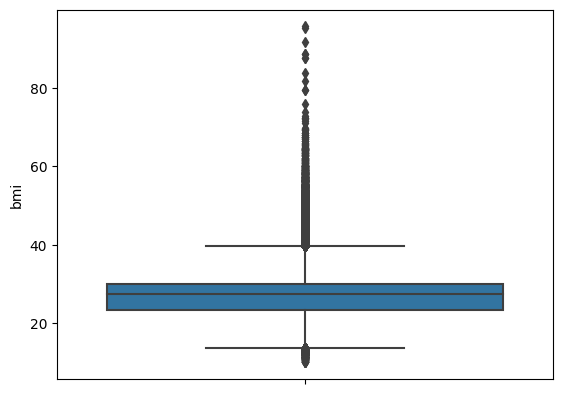

In [21]:
sns.boxplot(data=df,y="bmi")

In [22]:
# as we see we have many outliers from visualization, we want to remove it:
# 1. frist calculation IQR
IQR = df['bmi'].quantile(0.75) - df['bmi'].quantile(0.25)

# determine the upper and lower boundries : 
upper_boundry = df['bmi'].quantile(0.75) + (IQR*1.5)
lower_boundry = df['bmi'].quantile(0.25) - (IQR*1.5)

In [23]:
# removing outliers :
df = df[df['bmi'] <= upper_boundry]
df = df[df['bmi'] >= lower_boundry]


<Axes: ylabel='bmi'>

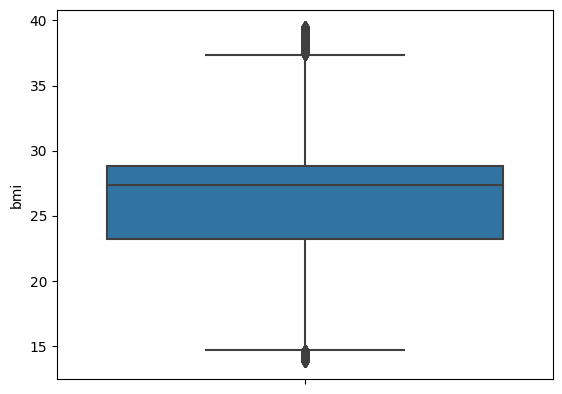

In [24]:
sns.boxplot(data=df,y="bmi")

In [25]:
df.shape

(90774, 9)

In [26]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<Axes: xlabel='hypertension', ylabel='count'>

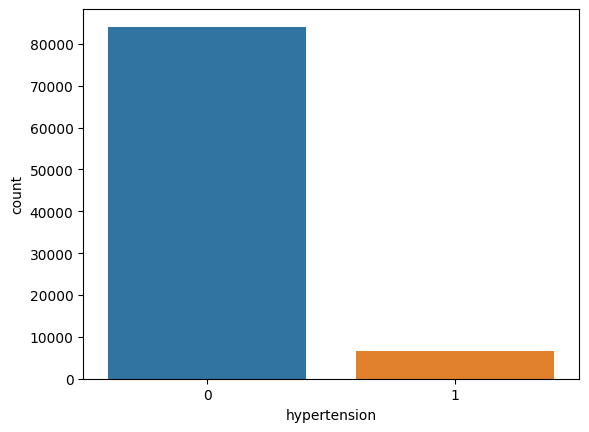

In [27]:
sns.countplot(data=df,x="hypertension")

In [28]:
# reset index after removing some outliers and duplicates :-
df = df.reset_index(drop=True)

In [29]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [30]:
df["hypertension"] = df["hypertension"].astype("object")

In [31]:
df["heart_disease"] = df["heart_disease"].astype("object")

In [32]:
df["diabetes"].value_counts()

0    83559
1     7215
Name: diabetes, dtype: int64

In [33]:
df["diabetes"] = df["diabetes"].astype("object")

<Axes: xlabel='diabetes', ylabel='count'>

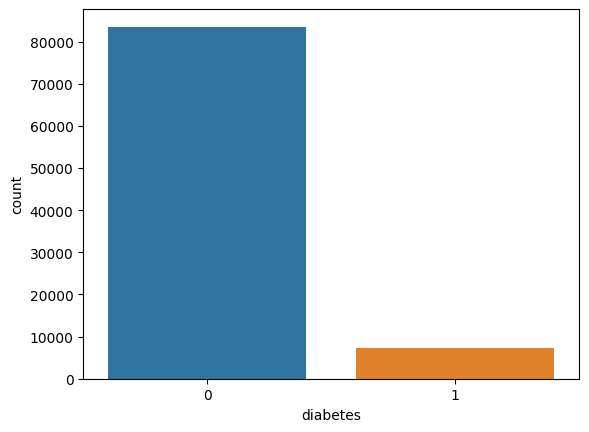

In [34]:
sns.countplot(data=df,x="diabetes")

### Observation : • There is a significant class imbalance in the dataset. Class 0 (indicating the absence of diabetes) has a much larger number of instances (83559) compared to Class1 (indicating the presence of diabetes) which has smaller number of instances(7215).

## Bivariate Analysis

<Axes: xlabel='diabetes', ylabel='age'>

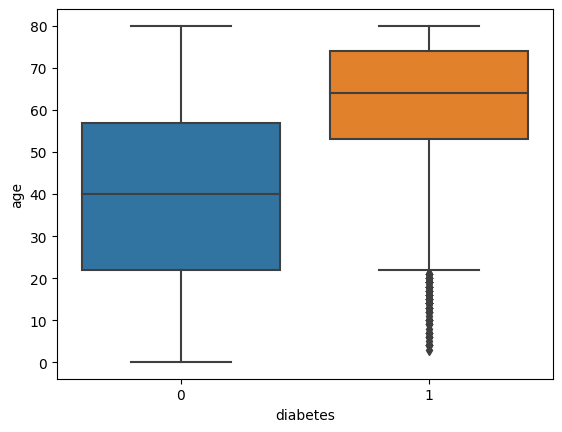

In [35]:
### age vs diabetes
sns.boxplot(data=df,x="diabetes",y="age")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90774 entries, 0 to 90773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90774 non-null  object 
 1   age                  90774 non-null  float64
 2   hypertension         90774 non-null  object 
 3   heart_disease        90774 non-null  object 
 4   smoking_history      90774 non-null  object 
 5   bmi                  90774 non-null  float64
 6   HbA1c_level          90774 non-null  float64
 7   blood_glucose_level  90774 non-null  int64  
 8   diabetes             90774 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.2+ MB


<Axes: xlabel='diabetes', ylabel='bmi'>

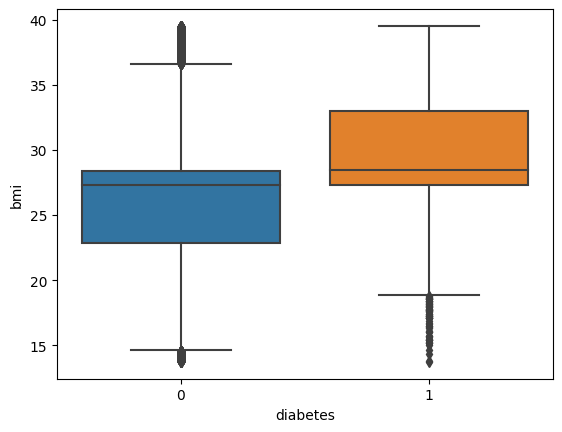

In [37]:
## bmi vs diabetes
sns.boxplot(data=df,x="diabetes",y="bmi")

<Axes: xlabel='diabetes', ylabel='HbA1c_level'>

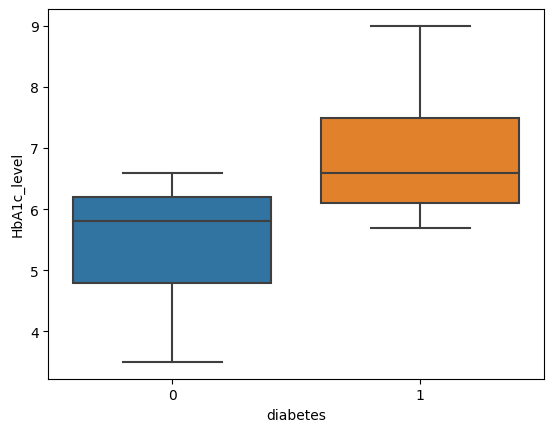

In [38]:
## HbA1c_level vs diabetes
sns.boxplot(data=df,x="diabetes",y="HbA1c_level")

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

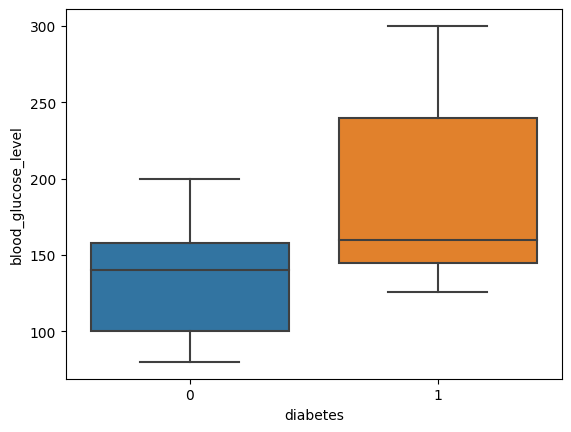

In [39]:
## blood_glucose_level vs diabetes
sns.boxplot(data=df,x="diabetes",y="blood_glucose_level")

## Separating Input and Output

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [12]:
x=df[["gender","age","hypertension","heart_disease","smoking_history","bmi","HbA1c_level","blood_glucose_level"]]

In [13]:
x.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


In [14]:
y=df["diabetes"]

In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

In [17]:
y_train.value_counts()

0    70187
1     6729
Name: diabetes, dtype: int64

In [18]:
y_train.head()

23167    0
53444    0
531      1
16463    1
65735    0
Name: diabetes, dtype: int64

## Transforming Data

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder


In [20]:
x_train_cat=x_train.select_dtypes(include="object")
x_train_cat.head() 

,gender,smoking_history
23167,Female,never
53444,Male,ever
531,Female,not current
16463,Female,never
65735,Male,never


In [21]:
#one hot encoding the cat features
encoder = OneHotEncoder(drop='first', handle_unknown='ignore',sparse=False)

x_train_cat =pd.DataFrame(encoder.fit_transform(x_train_cat),columns=encoder.get_feature_names_out(x_train_cat.columns), 
                               index = x_train_cat.index)
        

x_train_cat

,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
23167,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53444,1.0,0.0,0.0,1.0,0.0,0.0,0.0
531,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16463,0.0,0.0,0.0,0.0,0.0,1.0,0.0
65735,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
43445,1.0,0.0,0.0,1.0,0.0,0.0,0.0
98934,1.0,0.0,0.0,0.0,0.0,1.0,0.0
70619,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8967,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#numerical features
x_train_num=x_train.select_dtypes(include=["int32","int64","float64"])
x_train_num.head() 

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
23167,67.0,0,0,20.67,5.8,130
53444,64.0,1,0,30.13,3.5,100
531,49.0,1,0,36.93,8.8,155
16463,65.0,0,0,29.73,6.0,155
65735,58.0,0,0,42.12,5.0,80


In [23]:
#standardizing the num features 
scaler=StandardScaler()
x_train_num=pd.DataFrame(scaler.fit_transform(x_train_num),columns=x_train_num.columns,index=x_train_num.index)
x_train_num

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
23167,1.122943,-0.290557,-0.205205,-0.981991,0.249872,-0.202309
53444,0.989340,3.441660,-0.205205,0.416349,-1.895944,-0.937455
531,0.321325,3.441660,-0.205205,1.421498,3.048763,0.410313
16463,1.033874,-0.290557,-0.205205,0.357223,0.436465,0.410313
65735,0.722134,-0.290557,-0.205205,2.188663,-0.496499,-1.427553
...,...,...,...,...,...,...
43445,-0.168553,-0.290557,-0.205205,0.544949,0.436465,-1.182504
98934,0.232256,-0.290557,-0.205205,0.018724,-0.683092,0.532838
70619,-0.569362,-0.290557,-0.205205,1.134735,0.529761,-0.300328
8967,-0.346690,-0.290557,-0.205205,-0.531152,0.156575,-0.937455


In [24]:
X_train=pd.concat([x_train_cat,x_train_num],axis=1)
X_train

,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
23167,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.122943,-0.290557,-0.205205,-0.981991,0.249872,-0.202309
53444,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.989340,3.441660,-0.205205,0.416349,-1.895944,-0.937455
531,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.321325,3.441660,-0.205205,1.421498,3.048763,0.410313
16463,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.033874,-0.290557,-0.205205,0.357223,0.436465,0.410313
65735,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.722134,-0.290557,-0.205205,2.188663,-0.496499,-1.427553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43445,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.168553,-0.290557,-0.205205,0.544949,0.436465,-1.182504
98934,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.232256,-0.290557,-0.205205,0.018724,-0.683092,0.532838
70619,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.569362,-0.290557,-0.205205,1.134735,0.529761,-0.300328
8967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.346690,-0.290557,-0.205205,-0.531152,0.156575,-0.937455


### Transforming Test features

In [25]:
x_test_cat=x_test.select_dtypes(include="object")
x_test_cat.head() 

,gender,smoking_history
76807,Female,No Info
33445,Female,never
57530,Male,never
40106,Male,current
53119,Female,never


In [26]:
x_test_cat =pd.DataFrame(encoder.transform(x_test_cat),columns=encoder.get_feature_names_out(x_test_cat.columns), 
                               index = x_test_cat.index)
        

x_test_cat   

,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
76807,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33445,0.0,0.0,0.0,0.0,0.0,1.0,0.0
57530,1.0,0.0,0.0,0.0,0.0,1.0,0.0
40106,1.0,0.0,1.0,0.0,0.0,0.0,0.0
53119,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
38086,1.0,0.0,0.0,0.0,1.0,0.0,0.0
63544,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33497,0.0,0.0,0.0,0.0,1.0,0.0,0.0
64878,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
#numerical features
x_test_num=x_test.select_dtypes(include=["int32","int64","float64"])
x_test_num.head() 

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
76807,20.0,0,0,25.52,4.5,130
33445,38.0,0,0,42.12,4.8,90
57530,48.0,0,0,23.66,6.2,200
40106,41.0,0,0,27.44,6.5,90
53119,23.0,0,0,27.32,3.5,100


In [28]:
#standardizing the num features 

x_test_num=pd.DataFrame(scaler.transform(x_test_num),columns=x_test_num.columns,index=x_test_num.index)
x_test_num 

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
76807,-0.970171,-0.290557,-0.205205,-0.265083,-0.962981,-0.202309
33445,-0.168553,-0.290557,-0.205205,2.188663,-0.683092,-1.182504
57530,0.276790,-0.290557,-0.205205,-0.540021,0.623057,1.513033
40106,-0.034950,-0.290557,-0.205205,0.018724,0.902946,-1.182504
53119,-0.836568,-0.290557,-0.205205,0.000986,-1.895944,-0.937455
...,...,...,...,...,...,...
38086,0.900271,3.441660,-0.205205,0.000986,0.436465,1.513033
63544,0.054119,-0.290557,-0.205205,2.113277,0.996243,0.508333
33497,1.033874,-0.290557,-0.205205,0.000986,0.529761,-1.182504
64878,-0.168553,-0.290557,-0.205205,0.000986,0.156575,0.508333


In [29]:
X_test=pd.concat([x_test_cat,x_test_num],axis=1) 

## To balance the data in the output used smote()

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
s=SMOTE()

In [32]:
x_train,y_train = s.fit_resample(X_train,y_train)

In [33]:
x_train.shape

(140374, 13)

In [34]:
y_train.value_counts()

0    70187
1    70187
Name: diabetes, dtype: int64

## Building Logical Structure

In [35]:
from keras import Sequential 
from keras.layers import Dense 

In [36]:
model=Sequential()
model.add(Dense(28,activation="relu",use_bias=True,input_dim=13))#input_dim only for first hidden layer
model.add(Dense(18,activation="relu",use_bias=True))
model.add(Dense(8,activation="relu",use_bias=True))
model.add(Dense(1,activation="sigmoid",use_bias=True))  

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                392       
                                                                 
 dense_1 (Dense)             (None, 18)                522       
                                                                 
 dense_2 (Dense)             (None, 8)                 152       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1075 (4.20 KB)
Trainable params: 1075 (4.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"]) 
history = model.fit(x_train,y_train,batch_size=100,epochs=10,validation_split=0.2) 


Epoch 1/10
1123/1123 [==============================] - 3s 2ms/step - loss: 0.3172 - accuracy: 0.8592 - val_loss: 0.3523 - val_accuracy: 0.8281
Epoch 2/10
1123/1123 [==============================] - 2s 2ms/step - loss: 0.2397 - accuracy: 0.8895 - val_loss: 0.3418 - val_accuracy: 0.8317
Epoch 3/10
1123/1123 [==============================] - 2s 2ms/step - loss: 0.2349 - accuracy: 0.8903 - val_loss: 0.3042 - val_accuracy: 0.8560
Epoch 4/10
1123/1123 [==============================] - 2s 1ms/step - loss: 0.2319 - accuracy: 0.8915 - val_loss: 0.3317 - val_accuracy: 0.8385
Epoch 5/10
1123/1123 [==============================] - 2s 2ms/step - loss: 0.2295 - accuracy: 0.8928 - val_loss: 0.3083 - val_accuracy: 0.8520
Epoch 6/10
1123/1123 [==============================] - 2s 2ms/step - loss: 0.2272 - accuracy: 0.8938 - val_loss: 0.3169 - val_accuracy: 0.8488
Epoch 7/10
1123/1123 [==============================] - 2s 2ms/step - loss: 0.2250 - accuracy: 0.8949 - val_loss: 0.3004 - val_accuracy:

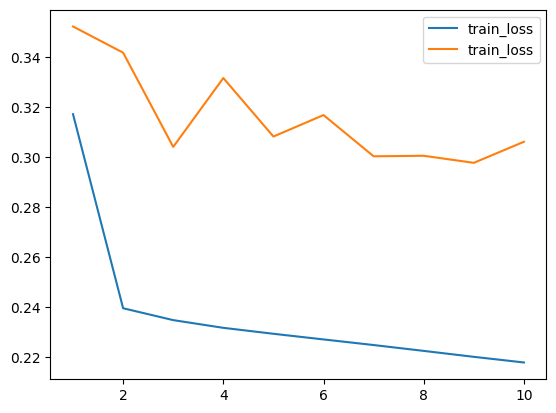

In [39]:
plt.plot(range(1,11),history.history["loss"],label="train_loss")
plt.plot(range(1,11),history.history["val_loss"],label="train_loss") 
plt.legend() 

In [40]:
predicted=model.predict(X_test)
predicted 

601/601 [==============================] - 1s 890us/step


array([[0.00146802],
       [0.00044069],
       [0.38353363],
       ...,
       [0.01806626],
       [0.0738435 ],
       [0.00210729]], dtype=float32)

In [41]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

0.9159646385855434


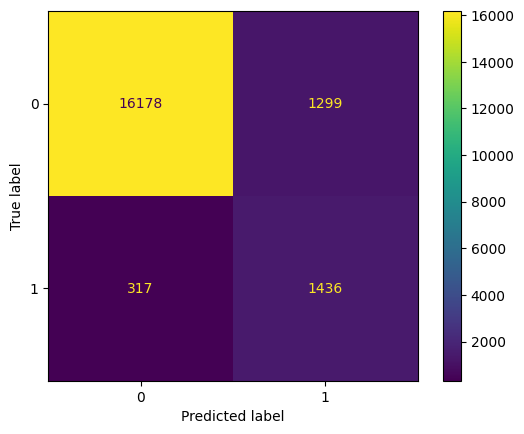

In [42]:

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

print(accuracy_score(y_test,predicted)) 

cm=confusion_matrix(y_test,predicted)

va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

